In [1]:
# requires newest version
#!pip install --upgrade panel # Python library that allows you to display plots with user customizable input
#!pip install --upgrade matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import panel as pn

pn.extension()

#%matplotlib inline

In [3]:
# Create the sigmoid function
def sigmoid_function(x, b, w):
    '''Calculates the y value for given x, b and w'''
    y = 1/(1+np.exp(-(b + w*x)))
    return y

In [4]:
# Create a function that helps the solver to solves for f(x) = 0.5 <-- The threshold
def helper_fsolve(x, b, w, sigmoid_function):
    '''
    Returns the value of the sigmoid function given x, b, and w.  Helper function for solving for the threshold.
    '''
    return sigmoid_function(x, b, w)-0.5

In [5]:
# Define how to plot the sigmoid function
def plot_sigmoid(x, y, thr):
    fig = plt.Figure()
    ax = fig.add_subplot()
    ax.plot(x, y, label='sigmoid function')
    ax.set_title('Sigmoid Function for Various Parameter Values')
    ax.set_xlabel('x-Values')
    ax.set_ylabel('y-Values')
    ax.axvline(thr, c='r', label='threshold')
    ax.set_xlim([-10, 10])
    ax.set_ylim([0, 1])
    ax.legend()
    return fig

In [6]:
# Create an interactive plotting environment
def draw(coefficient=1.0, intercept=0.0, view_fn=plot_sigmoid):
    x = np.linspace(-10.0, 10.0, 100)
    y = sigmoid_function(x, intercept, coefficient)
    thr = fsolve(func=helper_fsolve, x0=0, args=(intercept, coefficient, sigmoid_function))
    return view_fn(x, y, thr)

Row
    [0] ParamFunction(function)
    [1] Column
        [0] Markdown(str)
        [1] FloatSlider(end=5, name='coefficient', start=-5, value=1, value_throttled=1)
        [2] FloatSlider(end=8, name='intercept', start=-8, value_throttled=0)
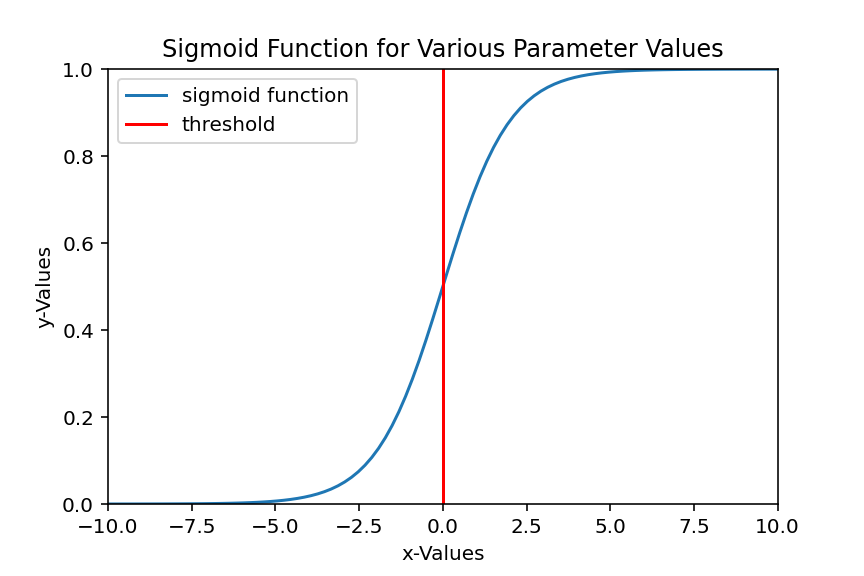

In [7]:
# Create the interactive plot with panel
import panel.widgets as pnw

coefficient  = pnw.FloatSlider(name='coefficient', value=1, start=-5, end=5)
intercept  = pnw.FloatSlider(name='intercept', value=0, start=-8, end=8)

@pn.depends(coefficient, intercept)
def reactive(coefficient, intercept):
    return draw(coefficient, intercept)

widgets   = pn.Column("<br>\n# Sigmoid Function", coefficient, intercept)
occupancy = pn.Row(reactive, widgets)
occupancy

## 3D-plot

In [8]:
# Create the sigmoid function
def sigmoid_function_3d(x1, x2, b, w1, w2):
    '''Calculates the y value for given x, b and w'''
    # y = np.array(())
    # for element in x:
    #     y = np.append(y, 1/(1+np.exp(-(b + w1*element[0] + w2*element[1]))))
    y = 1/(1+np.exp(-(b + w1*x1 + w2*x2)))
    return y

In [9]:
# Create a function that helps the solver to solves for f(x) = 0.5 <-- The threshold
def helper_fsolve_3d(x, b, w1, w2, sigmoid_function):
    '''
    Returns the value of the sigmoid function given x, b, and w.  Helper function for solving for the threshold.
    '''
    return sigmoid_function(x, b, w1, w2)-0.5

In [10]:
# Create x1 and x2 values
np.random.seed(0)
# Cartesian product of numpy arrays
x = np.dstack(np.meshgrid(np.linspace(-10.0, 10.0, 100), np.linspace(-10.0, 10.0, 100))).reshape(10000, 2)
x1 = np.array([element[0] for element in x])
x2 = np.array([element[1] for element in x])

y = sigmoid_function_3d(x1, x2, 0, 1, 2)

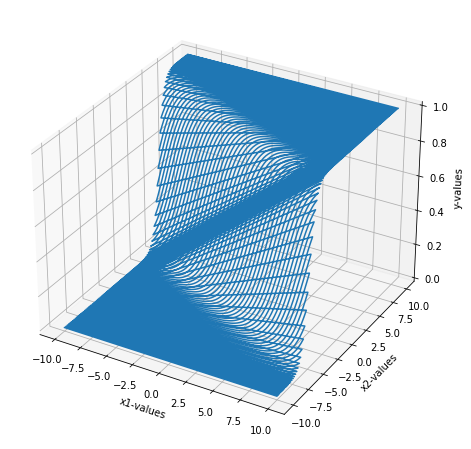

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
Axes3D.plot(ax, xs=x1, ys=x2, zs=y, label='function')
ax.set_xlabel('x1-values')
ax.set_ylabel('x2-values')
ax.set_zlabel('y-values')
plt.show()